In [1]:
import PIL
import cv2
import numpy as np
%matplotlib inline

In [2]:
def pil_image(img_path):
    pil_img = PIL.Image.open(img_path).convert('L') # transform to grayscale
    pil_img = pil_img.resize((105, 105)) # resize image to 1058105
    return pil_img

In [3]:
def noise_image(img):
    img_array = np.asarray(img)
    mean = 0.0
    std = 3
    noisy_img = img_array + np.random.normal(mean, std, img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped))
    noise_img = noise_img.resize((105, 105))
    return noise_img

In [4]:
def blur_image(img):
    blur_img = img.filter(PIL.ImageFilter.GaussianBlur(radius = 3))
    blur_img = blur_img.resize((105, 105))
    return blur_img

In [5]:
def affine_rotation(img):
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    anchor = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, anchor, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output))
    affine_img = affine_img.resize((105, 105))
    return affine_img

In [6]:
def gradient_fill(img):
    output = cv2.Laplacian(img, cv2.CV_64F)
    laplacian_img = PIL.Image.fromarray(np.uint8(output))
    laplacian_img = laplacian_img.resize((105, 105))
    return laplacian_img

In [26]:
import os

ttf_path = 'C/Lucas/XJTLU/Y3/1st_term/DTS201TC/founts'
data_path = '/dataset'

for file in os.listdir(ttf_path):
    if file.endswith('.ttf'):
        path = os.path.join(ttf_path, file)
        name, ext = os.path.splitext(os.path.basename(path))
        out_path = data_path + '/' + name
        command = 'trdg -l en -c 10 -rs -let -num -r --length 1 -b 1 -e .png -fi -f 105 -ft ' + path + ' --output_dir ' + out_path
        os.system(command)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C/Lucas/XJTLU/Y3/1st_term/DTS201TC/founts'

In [7]:
import os
from imutils import paths
#from random import shuffle
import random
data_path = './dataset'
image_paths = sorted(list(paths.list_images(data_path)))
#random.seed(10)
random.shuffle(image_paths)

font_names = []

for f in os.listdir(data_path):
    if not f.startswith('.'):
        font_names.append(f)

font_names.sort()

print('Font Names -> ', font_names)

Font Names ->  ['Aller_Bd', 'BEBAS___', 'Capture_it', 'Lato-ThinItalic', 'Walkway_Black']


In [8]:
def conv_label(label):
    return font_names.index(label)


In [9]:
import os
import itertools
import numpy as np
from keras.utils import image_utils
from PIL import ImageFilter
import PIL
data = []
labels = []
auguments = ["blur", "noise", "affine", "gradient"]

for path in image_paths:
    label = path.split(os.path.sep)[-2]

    if not label.startswith('.'):
        label = conv_label(label)
    else:
        continue

    pil_img = pil_image(path)
    org_img = image_utils.img_to_array(pil_img)

    data.append(org_img)
    labels.append(label)

    for i in range(0, len(auguments)):
        for augument in list(itertools.combinations(auguments, i + 1)):

            temp_img = pil_img
            combinations = list(augument)

            for method in combinations:
                if method == 'noise':
                    temp_img = noise_image(temp_img)

                elif method == 'blur':
                    temp_img = blur_image(temp_img)

                elif method == 'affine':
                    open_cv_affine = np.array(pil_img)
                    temp_img = affine_rotation(open_cv_affine)

                elif method == 'gradient':
                    open_cv_gradient = np.array(pil_img)
                    temp_img = gradient_fill(open_cv_gradient)

            temp_img = image_utils.img_to_array(temp_img)

            data.append(temp_img)
            labels.append(label)

In [10]:
print(labels)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
from sklearn.model_selection import train_test_split

data = np.asarray(data, dtype = "float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.25, random_state = 10)


In [12]:
from keras.utils import to_categorical

trainY = to_categorical(trainY, num_classes = len(font_names))
testY = to_categorical(testY, num_classes = len(font_names))

In [13]:
from keras.preprocessing.image import ImageDataGenerator

augmented_images = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [14]:
from keras import backend as K

K.set_image_data_format('channels_last')

In [15]:
from keras.models import Sequential
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose

def create_model():
    model = Sequential()

    #Cu Layers
    model.add(Conv2D(64, kernel_size = (48, 48), activation = 'relu', input_shape = (105, 105, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(128, kernel_size = (24, 24), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2DTranspose(128, (24, 24), strides = (2, 2), activation = 'relu', padding = 'same', kernel_initializer = 'uniform'))
    model.add(UpSampling2D(size = (2, 2)))

    model.add(Conv2DTranspose(64, (12, 12), strides = (2, 2), activation = 'relu', padding = 'same', kernel_initializer = 'uniform'))
    model.add(UpSampling2D(size = (2, 2)))

    #Cs Layers
    model.add(Conv2D(256, kernel_size=(12, 12), activation = 'relu'))
    model.add(Conv2D(256, kernel_size=(12, 12), activation = 'relu'))
    model.add(Conv2D(256, kernel_size=(12, 12), activation = 'relu'))

    model.add(Flatten())
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2383, activation = 'relu'))
    model.add(Dense(len(font_names), activation = 'softmax'))

    return model

In [16]:
from keras import optimizers

batch_size = 128
epochs = 10
model= create_model()
opt = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['accuracy'])

C:\Lucas\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 64)        147520    
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 128)         4718720   
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 128)        512       
 hNormalization)                                                 
                                                        

model.summary()

In [38]:
from keras import callbacks
#from tensorflow.keras.callbacks import ModelCheckpoint

model_path = "model_store_path"
my_callbacks = [
    callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 0, mode = 'min'),
    callbacks.ModelCheckpoint(model_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
]

model.fit(
    trainX,
    trainY,
    shuffle = True,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data = (testX, testY),
    callbacks = my_callbacks
)

Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 0.1293 - accuracy: 0.4280 
Epoch 1: val_loss improved from inf to 0.17203, saving model to model_store_path


INFO:tensorflow:Assets written to: model_store_path\assets


INFO:tensorflow:Assets written to: model_store_path\assets


47/47 [==============================] - 2826s 60s/step - loss: 0.1293 - accuracy: 0.4280 - val_loss: 0.1720 - val_accuracy: 0.2005
Epoch 2/10
47/47 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.7645 
Epoch 2: val_loss improved from 0.17203 to 0.13554, saving model to model_store_path


INFO:tensorflow:Assets written to: model_store_path\assets


INFO:tensorflow:Assets written to: model_store_path\assets


47/47 [==============================] - 3027s 65s/step - loss: 0.0627 - accuracy: 0.7645 - val_loss: 0.1355 - val_accuracy: 0.3605
Epoch 3/10
47/47 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9625 
Epoch 3: val_loss improved from 0.13554 to 0.08467, saving model to model_store_path


INFO:tensorflow:Assets written to: model_store_path\assets


INFO:tensorflow:Assets written to: model_store_path\assets


47/47 [==============================] - 2804s 60s/step - loss: 0.0131 - accuracy: 0.9625 - val_loss: 0.0847 - val_accuracy: 0.7210
Epoch 4/10
47/47 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9795 
Epoch 4: val_loss did not improve from 0.08467
47/47 [==============================] - 2710s 58s/step - loss: 0.0069 - accuracy: 0.9795 - val_loss: 0.0975 - val_accuracy: 0.6450
Epoch 5/10
47/47 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9883 
Epoch 5: val_loss did not improve from 0.08467
47/47 [==============================] - 2739s 58s/step - loss: 0.0043 - accuracy: 0.9883 - val_loss: 0.1166 - val_accuracy: 0.6165
Epoch 6/10
47/47 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9833 
Epoch 6: val_loss did not improve from 0.08467
47/47 [==============================] - 2741s 58s/step - loss: 0.0056 - accuracy: 0.9833 - val_loss: 0.1576 - val_accuracy: 0.4555
Epoch 7/10
47/47 [============================

In [39]:
from keras.models import load_model

model_path = "model_store_path"
model = load_model(model_path)
score = model.evaluate(testX, testY, verbose = 0)

print('Test loss ->', score[0])
print('Test accuracy ->', score[1])

Test loss -> 0.08466523140668869
Test accuracy -> 0.7210000157356262


In [42]:
import PIL
from keras.utils import image_utils

img_path = "./imgs/after_69.jpg"

org_img = PIL.Image.open(img_path).convert('L')
pil_img = blur_image(org_img)
pil_img = image_utils.img_to_array(pil_img)

In [43]:
def rev_conv_label(label):
    return font_names[label]


In [44]:
import numpy as np

data = []
data.append(pil_img)
data = np.asarray(data, dtype = "float") / 255.0
y = np.argmax(model.predict(data), axis = -1)

1/1 [==============================] - 0s 412ms/step


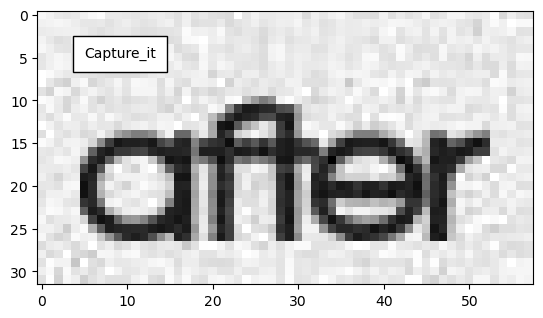

In [45]:
import matplotlib.cm as cm
import matplotlib.pylab as plt

label = rev_conv_label(int(y[0]))
fig, ax = plt.subplots(1)
ax.imshow(org_img, interpolation = 'nearest', cmap = cm.gray)
ax.text(5, 5, label, bbox = { 'facecolor': 'white', 'pad': 8 })
plt.show()